In [1]:
import numpy as np
import pandas as pd
import torch
from sc_sharp import scSHARP
from test_model import test_model
import utilities
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import statistics

/home/users/lewinsda/.conda/envs/daniel_thesis_2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
grid_results = pd.read_csv("grid_search_pbmc_output/combined.csv", header=None, index_col=0)
grid_results.columns = ["Total Accuracy", "Val Accuracy", "Test Accuracy", "Total SD", "Val SD", "Test SD", "Config", "Dropout", "Batch", "Neighbors"]
grid_results['GCN Layers'] = grid_results['Config'].apply(lambda x: x.split('_')[0])
grid_results['Final Embedding'] = grid_results['Config'].apply(lambda x: x.split('_')[1].split(".")[0])
grid_results['GCN Layers'] = pd.to_numeric(grid_results['GCN Layers'])
grid_results['Final Embedding'] = pd.to_numeric(grid_results['Final Embedding'])
grid_results.sort_values("Val Accuracy", ascending=False).head(10)

,Total Accuracy,Val Accuracy,Test Accuracy,Total SD,Val SD,Test SD,Config,Dropout,Batch,Neighbors,GCN Layers,Final Embedding
0,,,,,,,,,,,,
7,0.960198,0.942359,0.0,0.000491,0.002528,0.0,2_25.txt,0.0,50,2,2,25
97,0.960016,0.941421,0.0,0.000614,0.003163,0.0,2_40.txt,0.0,50,2,2,40
162,0.959990,0.941287,0.0,0.000891,0.004592,0.0,2_60.txt,0.0,95,10,2,60
8,0.959964,0.941153,0.0,0.000730,0.003762,0.0,2_25.txt,0.0,50,5,2,25
155,0.959886,0.940751,0.0,0.000874,0.004504,0.0,2_60.txt,0.0,65,5,2,60
152,0.959833,0.940483,0.0,0.000707,0.003641,0.0,2_60.txt,0.0,50,5,2,60
143,0.959781,0.940214,0.0,0.000509,0.002621,0.0,2_15.txt,0.0,95,5,2,15
16,0.959755,0.940080,0.0,0.000476,0.002451,0.0,2_25.txt,0.0,95,2,2,25
9,0.958767,0.939946,0.0,0.003307,0.005680,0.0,2_25.txt,0.0,50,10,2,25


In [3]:
set(range(1,217))-set(grid_results.index.to_numpy())

set()

In [5]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

fig, axs = plt.subplots(2,2)
sns.violinplot(x=grid_results["Neighbors"], y=grid_results["Val Accuracy"], ax = axs[0][0])
sns.violinplot(x=grid_results["Batch"], y=grid_results["Val Accuracy"], ax = axs[0][1])
sns.violinplot(x=grid_results["GCN Layers"], y=grid_results["Val Accuracy"], ax = axs[1][0])
sns.violinplot(x=grid_results["Final Embedding"], y=grid_results["Val Accuracy"], ax = axs[1][1])

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


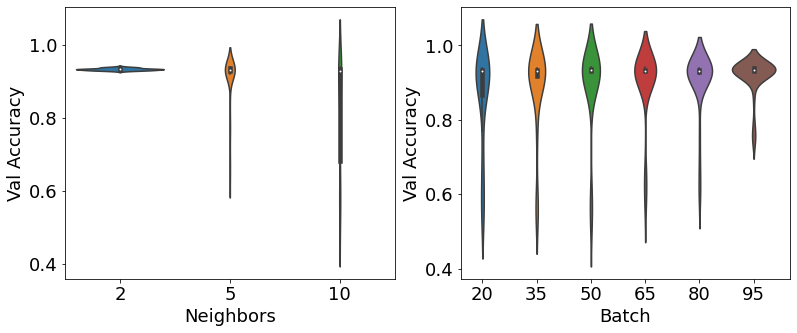

In [8]:
fig, axs = plt.subplots(1,2, figsize=(13, 5))
sns.violinplot(x=grid_results["Neighbors"], y=grid_results["Val Accuracy"], ax = axs[0])
sns.violinplot(x=grid_results["Batch"], y=grid_results["Val Accuracy"], ax = axs[1])
plt.plot()
plt.savefig("figures/pmbc_param1.pdf", format="pdf", bbox_inches="tight")
plt.show()

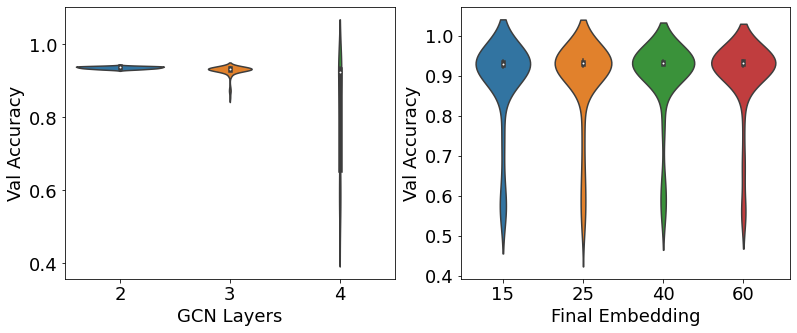

In [9]:
fig, axs = plt.subplots(1,2,figsize=(13, 5))
sns.violinplot(x=grid_results["GCN Layers"], y=grid_results["Val Accuracy"], ax = axs[0])
sns.violinplot(x=grid_results["Final Embedding"], y=grid_results["Val Accuracy"], ax = axs[1])
plt.plot()
plt.savefig("figures/pbmc_param2.pdf", format="pdf", bbox_inches="tight")
plt.show()

accuracy results generated this way:

sbatch run_pbmc_test.sh

data_folders = ["/home/groups/ConradLab/daniel/sharp_data/pbmc_test/"]
    tools = ["sctype","scsorter","scina", "singler", "scpred"]
    #tools = ["sctype","scsorter","scina"]
    votes_necessary = .51
    model_file = "configs/2_25.txt"
    neighbors = 2
    batch_size=50
    training_epochs=150
    random_inits = 5
    counts="counts.csv"
    meta="labels_cd4-8.csv"
    meta_col = 0
    df = test_model(data_folders, tools, votes_necessary, model_file, neighbors, batch_size, training_epochs, random_inits, counts=counts, meta=meta, meta_col=meta_col)
    df.to_csv("pbmc_test_results.csv")


In [3]:
results = pd.read_csv("pbmc_test_results.csv", index_col=0)
results

,data_name,method,total_accuracy,train_accuracy,test_accuracy,total_sd,train_sd,test_sd
0,pbmc_test,GCN,0.931252,0.938236,0.705801,0.000464,0.000035,0.015326
1,pbmc_test,Max Col.,0.912137,0.938287,0.067965,0.000000,0.000000,0.000000
2,pbmc_test,Confident Labels,NaN,0.938287,NaN,0.000000,0.000000,0.000000
3,pbmc_test,sctype,0.854867,0.856016,0.817749,0.000000,0.000000,0.000000
4,pbmc_test,scsorter,0.714845,0.716579,0.658874,0.000000,0.000000,0.000000
5,pbmc_test,scina,0.733445,0.754234,0.062338,0.000000,0.000000,0.000000
6,pbmc_test,singler,0.702787,0.720414,0.133766,0.000000,0.000000,0.000000
7,pbmc_test,scpred,0.743890,0.761650,0.170563,0.000000,0.000000,0.000000
8,pbmc_test,Tool Avg.,0.749967,0.761779,0.368658,0.060773,0.056329,0.344295


(0.0, 1.0)

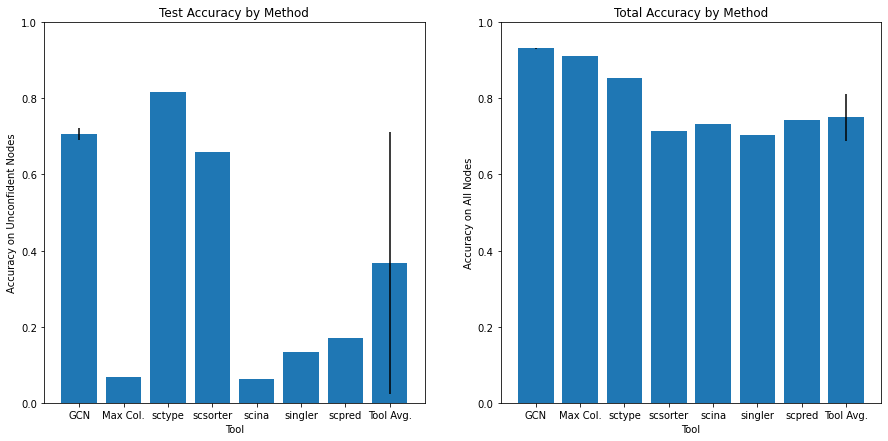

In [4]:
to_plot = results.loc[results['method']!="Confident Labels",:]
fig, ax = plt.subplots(1,2,figsize=(15, 7))
ax[0].bar(to_plot['method'],  to_plot['test_accuracy'], yerr= to_plot['test_sd'], align='center')
ax[0].set_xlabel("Tool")
ax[0].set_ylabel("Accuracy on Unconfident Nodes")
ax[0].set_title("Test Accuracy by Method")
ax[1].bar(to_plot['method'],  to_plot['total_accuracy'], yerr= to_plot['total_sd'], align='center')
ax[1].set_xlabel("Tool")
ax[1].set_ylabel("Accuracy on All Nodes")
ax[1].set_title("Total Accuracy by Method")
ax[0].set_ylim([0, 1])
ax[1].set_ylim([0, 1])

In [13]:
int_df = pd.read_csv("pbmc_test_interpretation.csv", index_col=0)
#statistics.mean(scale_int_df.iloc[:,0])
reorg_keys = ["b_cells", "cd14_monocytes", "cd56_nk", "cd8_t_cell", "cd4_t_cell"]
int_df = int_df[reorg_keys]
int_df = int_df.abs()
scale_int_df = pd.DataFrame(preprocessing.scale(int_df, with_mean=False))
scale_int_df.columns = int_df.columns
scale_int_df.index = int_df.index
scale_int_df.sort_values("cd4_t_cell", ascending=False).head(10)

,b_cells,cd14_monocytes,cd56_nk,cd8_t_cell,cd4_t_cell
LTB,27.738410,0.146205,0.810016,11.293178,33.070637
FTH1,10.798422,51.537754,6.340851,11.638375,29.218869
CD3E,0.005234,0.002832,2.490053,24.469191,25.040269
MT-CO2,10.458646,15.498238,9.526059,3.384439,24.020895
RPL34,7.252808,0.535317,15.033418,3.154943,23.602739
S100A4,0.105431,22.049214,1.222469,0.645825,23.244718
CD3D,0.009171,0.018589,0.605545,14.378980,22.373944
RPL37,8.544748,4.127163,6.787735,3.865191,21.067187
RPL7,5.762127,7.818111,8.715361,13.682990,19.465482
UBC,8.455023,19.997481,2.208206,0.659358,19.453267


In [10]:
#"CD74", "HLA-DRA", "CD79A", "CD79B", "HLA-DRB1"
scale_int_df.sort_values("b_cells", ascending=False).head(10)

,b_cells,cd14_monocytes,cd4_t_cell,cd56_nk,cd8_t_cell
CD74,71.503861,12.285791,4.777439,7.308379,4.045139
HLA-DRA,49.437657,12.828225,0.633494,0.171549,0.286577
CD79A,32.328959,0.031498,0.124167,0.085082,0.544220
CD79B,31.589568,0.022558,1.034737,1.454509,0.025091
HLA-DRB1,31.462966,21.495164,2.300194,1.155180,1.886261
LTB,27.738410,0.146205,33.070637,0.810016,11.293178
HLA-DPA1,25.073663,1.072749,0.973912,1.023743,1.019922
HLA-DPB1,22.598056,3.853520,0.906961,1.173400,2.249338
HLA-DRB5,16.030404,12.691769,1.230882,0.570063,1.103094
CD37,15.105807,3.969624,0.563628,4.385218,2.156192


In [11]:
#"FTH1", "TYROBP", "S100A9", "S100A8", "FTL"
scale_int_df.sort_values("cd14_monocytes", ascending=False).head(10)

,b_cells,cd14_monocytes,cd4_t_cell,cd56_nk,cd8_t_cell
FTH1,10.798422,51.537754,29.218869,6.340851,11.638375
TYROBP,0.008744,34.771910,0.013469,25.774744,0.034673
S100A9,0.005590,33.639921,0.016196,0.002881,0.003281
S100A8,0.003658,30.969252,0.000080,0.003886,0.000561
FTL,1.833898,28.840982,3.731140,17.947105,13.296800
CST3,0.010116,27.954317,0.002331,0.108884,0.007567
LYZ,0.006291,22.137206,0.001636,0.004034,0.000277
S100A4,0.105431,22.049214,23.244718,1.222469,0.645825
HLA-DRB1,31.462966,21.495164,2.300194,1.155180,1.886261
UBC,8.455023,19.997481,19.453267,2.208206,0.659358


In [12]:
#"LTB", "FTH1", "CD3E", "MT-CO2","RPL34"
scale_int_df.sort_values("cd4_t_cell", ascending=False).head(10)

,b_cells,cd14_monocytes,cd4_t_cell,cd56_nk,cd8_t_cell
LTB,27.738410,0.146205,33.070637,0.810016,11.293178
FTH1,10.798422,51.537754,29.218869,6.340851,11.638375
CD3E,0.005234,0.002832,25.040269,2.490053,24.469191
MT-CO2,10.458646,15.498238,24.020895,9.526059,3.384439
RPL34,7.252808,0.535317,23.602739,15.033418,3.154943
S100A4,0.105431,22.049214,23.244718,1.222469,0.645825
CD3D,0.009171,0.018589,22.373944,0.605545,14.378980
RPL37,8.544748,4.127163,21.067187,6.787735,3.865191
RPL7,5.762127,7.818111,19.465482,8.715361,13.682990
UBC,8.455023,19.997481,19.453267,2.208206,0.659358


In [13]:
#"GNLY", "NKG7", "TYROBP", "RPS21", "GZMB"
scale_int_df.sort_values("cd56_nk", ascending=False).head(10)

,b_cells,cd14_monocytes,cd4_t_cell,cd56_nk,cd8_t_cell
GNLY,0.000767,0.063211,0.109159,45.165755,0.570567
NKG7,0.007192,0.329550,0.018179,31.832655,3.964723
TYROBP,0.008744,34.771910,0.013469,25.774744,0.034673
RPS21,2.480049,2.233240,4.441996,23.617552,10.333544
GZMB,0.001043,0.029663,0.000378,23.577857,0.201277
RPL38,8.781914,1.275361,6.044573,22.183132,2.982966
HCST,0.558962,9.063527,7.038983,21.138394,0.015964
FCER1G,0.000032,11.766580,0.042267,19.299769,0.470434
FTL,1.833898,28.840982,3.731140,17.947105,13.296800
RPS26,8.908529,0.577442,16.954016,17.634093,1.527688


In [15]:
#"CD8B", "CD3E", "CTSW", "TPT1", "EEF1A1"
scale_int_df.sort_values("cd8_t_cell", ascending=False).head(10)

,b_cells,cd14_monocytes,cd4_t_cell,cd56_nk,cd8_t_cell
CD8B,0.006873,0.000000,0.413460,0.087612,88.319211
CD3E,0.005234,0.002832,25.040269,2.490053,24.469191
CTSW,0.053518,0.052642,2.649404,7.838819,22.452703
TPT1,0.471177,1.445885,3.361297,3.311289,18.320447
EEF1A1,2.473502,6.728742,6.138640,2.684867,18.133883
HLA-C,3.955381,9.739242,1.888996,6.981474,17.752205
CCL5,0.492645,0.055412,0.398813,8.097388,16.085756
MALAT1,1.964112,19.079818,1.218129,7.522767,14.715976
CD3D,0.009171,0.018589,22.373944,0.605545,14.378980
EEF1D,0.410111,7.353027,4.451544,1.329477,13.920500


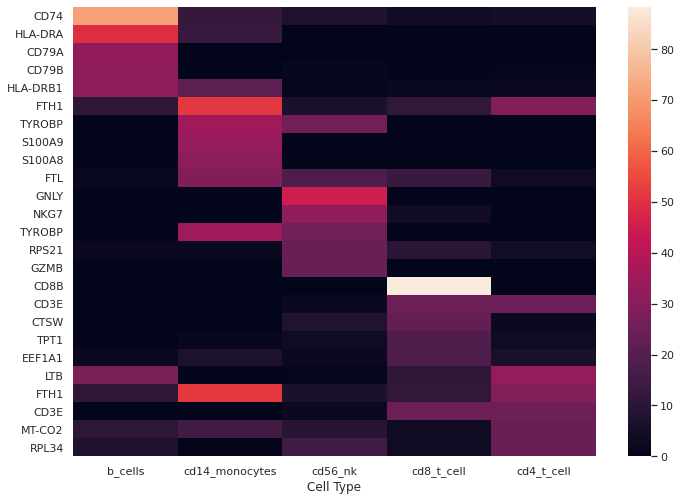

In [14]:
markers = ["CD74", "HLA-DRA", "CD79A", "CD79B", "HLA-DRB1", "FTH1", "TYROBP", "S100A9", "S100A8", "FTL", "GNLY", "NKG7", "TYROBP", "RPS21", "GZMB", "CD8B", "CD3E", "CTSW", "TPT1", "EEF1A1", "LTB", "FTH1", "CD3E", "MT-CO2","RPL34"]
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(scale_int_df.loc[markers,:])
ax.set(xlabel="Cell Type")
plt.plot()
plt.savefig("figures/pbmc_att_heatmap.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [18]:
for cell in scale_int_df.columns:
    print(cell)
    print(scale_int_df[cell].std())

b_cells
1.0000278098363444
cd14_monocytes
1.0000278098363444
cd4_t_cell
1.0000278098363444
cd56_nk
1.0000278098363444
cd8_t_cell
1.0000278098363444


In [12]:
torch.cuda.is_available()

True

[Text(0.5, 14.09375, 'Cell Type')]

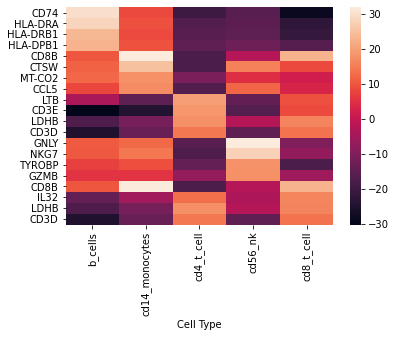

In [9]:
keep_genes = scale_int_df.sort_values('b_cells', ascending=False).head(4).index.tolist()
keep_genes += scale_int_df.sort_values('cd14_monocytes', ascending=False).head(4).index.tolist()
keep_genes += scale_int_df.sort_values("cd4_t_cell", ascending=False).head(4).index.tolist()
keep_genes += scale_int_df.sort_values("cd56_nk", ascending=False).head(4).index.tolist()
keep_genes += scale_int_df.sort_values("cd8_t_cell", ascending=False).head(4).index.tolist()
ax = sns.heatmap(scale_int_df.loc[keep_genes,:])
ax.set(xlabel="Cell Type")

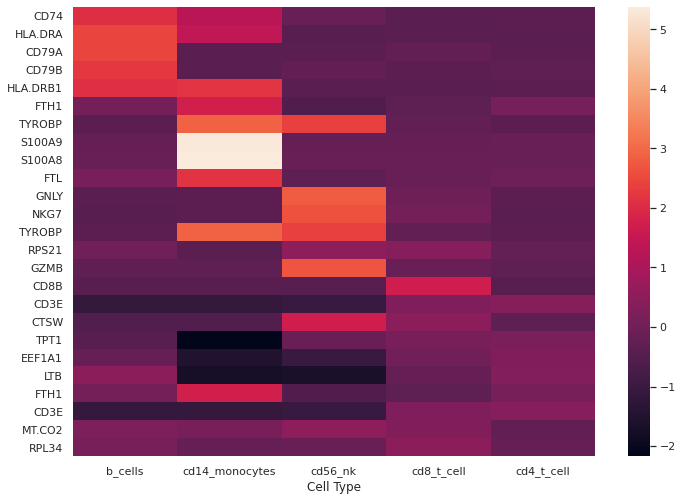

In [17]:
expr = pd.read_csv("figures/pbmc_expr.csv", index_col=0)
#expr = np.arcsinh(expr)
#scale_expr = pd.DataFrame(preprocessing.scale(expr, with_mean=False))
#scale_expr.columns = expr.columns
#scale_expr.index = expr.index
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(expr)
ax.set(xlabel="Cell Type")
plt.plot()
plt.savefig("figures/pbmc_expr_heatmap.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [28]:
scale_int_df.sort_values("cd4_t_cell", ascending=False).loc['CD3G',:]

b_cells          -0.035266
cd14_monocytes    0.011065
cd4_t_cell       -0.366170
cd56_nk          -0.112239
cd8_t_cell        1.164784
Name: CD3G, dtype: float64

In [12]:
(int_df['cd8_t_cell'] - int_df["cd4_t_cell"]).sort_values(ascending=False)

CD8B      195.379651
CTSW      136.848256
CCL5      113.952810
HCST       95.061545
CD8A       89.288700
             ...    
CORO1B    -58.203480
CD3E      -62.557420
FTH1      -67.799429
S100A4    -70.289234
LTB       -84.600580
Length: 17980, dtype: float64

In [13]:
int_df.sort_values("cd8_t_cell", ascending=False).loc["CD8A",:]

b_cells           10.709266
cd14_monocytes    92.354900
cd4_t_cell       -93.201584
cd56_nk           21.603033
cd8_t_cell        -3.912884
Name: CD8A, dtype: float64

In [11]:
meta_path = "/home/groups/ConradLab/daniel/sharp_data/pbmc_test/labels_cd4-8.csv"
labels = pd.read_csv(meta_path, index_col=0)
labels.head(50)

,labels
CTCAATTGCTTGAG-1-15,cd8_t_cell
ATGTTGCTTTGCGA-1-34,cd56_nk
TGATCGGACACAAC-1-41,cd4_t_cell
ACAAAGGAAGATGA-1-74,cd4_t_cell
CAATATGATGCTTT-1-20,cd4_t_cell
GATTTAGACCAAGT-1-74,cd4_t_cell
TAAGTCCTTTCTAC-1-26,cd4_t_cell
CATTGGGAATCAGC-1-39,b_cells
TCATGTACTCTTCA-1-41,cd4_t_cell
ACCCACTGCGTAAC-1-20,cd4_t_cell


In [14]:
def get_tool_accuracy(labels_path, pred_path, tool_list, types, keep_cells):
    
    real_labels = pd.read_csv(labels_path, index_col=0)['labels']
    real_labels,_ = pd.factorize(real_labels, sort=True)
    preds_df = pd.read_csv(pred_path, index_col=0)
    real_labels = real_labels[keep_cells]
    for tool in tool_list:
        print(tool)
        factored_tool,_ = pd.factorize(preds_df[tool], sort=True)
        for cell_type in types:
            print(cell_type)
            print((torch.Tensor(factored_tool[real_labels == cell_type]) == torch.Tensor(real_labels[real_labels==cell_type])).type(torch.FloatTensor).mean())

In [27]:
preds_df = pd.read_csv(pred_path, index_col=0)
preds_df.shape

(76881, 5)

In [12]:
keep_cells = np.genfromtxt('pbmc_keep_cells.csv', delimiter=',')
keep_cells.shape

(76906,)

In [28]:
np.count_nonzero(keep_cells)

1

In [34]:
keep_cells[0:10]

(76906,)

In [35]:
keep_cells = pd.read_csv('pbmc_keep_cells.csv', header=None)

In [36]:
keep_cells = np.array(keep_cells.iloc[0,:])

In [37]:
label_path = "/home/groups/ConradLab/daniel/sharp_data/pbmc_test/labels_cd4-8.csv"
pred_path = "/home/groups/ConradLab/daniel/sharp_data/pbmc_test/preds.csv"
tool_list = ['scsorter']
get_tool_accuracy(label_path, pred_path, tool_list, [0,1,2,3,4], keep_cells)

scsorter
0
tensor(0.9955)
1
tensor(0.8428)
2
tensor(0.5091)
3
tensor(0.8361)
4
tensor(0.9186)


In [15]:
np.count_nonzero(labels.to_numpy() == "cd56_nk")

7572

In [9]:
conf_labels = pd.read_csv("/home/groups/ConradLab/daniel/sharp_data/pbmc_test/confident_labels.csv", index_col=0)
conf_labels

,0
0,4.0
1,3.0
2,2.0
3,2.0
4,2.0
...,...
76876,0.0
76877,1.0
76878,4.0
76879,2.0


In [12]:
umap_embedding = pd.read_csv("/home/groups/ConradLab/daniel/sharp_data/pbmc_test/umap_embedding.csv", index_col=0)
umap_embedding['real labels'] = labels

umap_embedding['confident labels'] = conf_labels.astype('int').to_numpy().flatten()
map_dict = {-1:"unknown", 0:"b_cells", 1:"cd14_monocytes", 2:"cd4_t_cell", 3:"cd56_nk", 4:"cd8_t_cell"}
umap_embedding['confident labels'] = umap_embedding["confident labels"].map(map_dict)

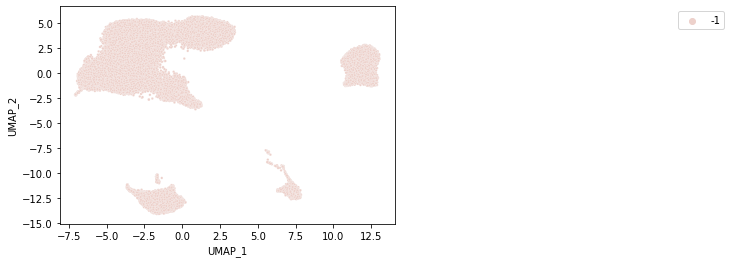

In [8]:
umap_embedding = pd.read_csv("/home/groups/ConradLab/daniel/sharp_data/pbmc_test/umap_embedding.csv", index_col=0)
umap_embedding['unknown'] = [-1] * umap_embedding.shape[0]
sns.scatterplot(data=umap_embedding, x="UMAP_1", y="UMAP_2", hue="unknown", s=6)
plt.legend(bbox_to_anchor=(2,1))

In [29]:
umap_embedding['confident labels']

CTCAATTGCTTGAG-1-15        cd8_t_cell
ATGTTGCTTTGCGA-1-34           cd56_nk
TGATCGGACACAAC-1-41        cd8_t_cell
ACAAAGGAAGATGA-1-74        cd8_t_cell
CAATATGATGCTTT-1-20        cd8_t_cell
                            ...      
GAACCTGAGTCCTC-1-39           b_cells
ACGGTAACTAACGC-1-57    cd14_monocytes
AAGATGGACACTCC-1-27        cd8_t_cell
CATGCGCTTAACCG-1-26        cd8_t_cell
GGAGTTTGTTGACG-1-27        cd8_t_cell
Name: confident labels, Length: 76881, dtype: object

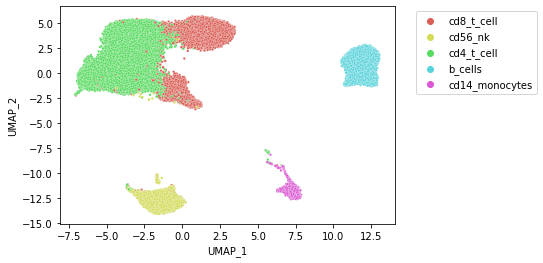

In [13]:
sns.scatterplot(data=umap_embedding, x="UMAP_1", y="UMAP_2", hue="real labels", s=6, palette=dict(cd8_t_cell='#db5f57', cd56_nk="#d3db57", cd4_t_cell = "#57db5f", b_cells='#57d3db', cd14_monocytes='#db57d3'))
plt.legend(bbox_to_anchor=(1.05,1))

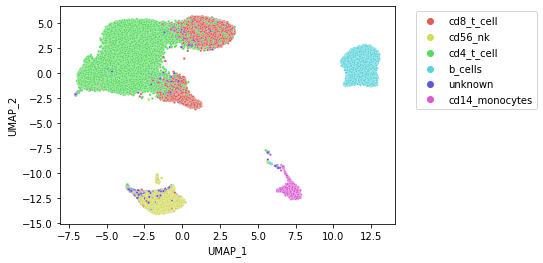

In [11]:
sns.scatterplot(data=umap_embedding, x="UMAP_1", y="UMAP_2", hue="confident labels", s=6, palette=dict(cd8_t_cell='#db5f57', cd56_nk="#d3db57", cd4_t_cell = "#57db5f", b_cells='#57d3db', cd14_monocytes='#db57d3', unknown='#5f57db'))
plt.legend(bbox_to_anchor=(1.05,1))

In [6]:
#conf_labels = conf_labels.astype('int').to_numpy().flatten()
np.count_nonzero(conf_labels[conf_labels==-1])

2149

In [4]:
conf_labels[-20:]

array([2, 4, 1, 0, 2, 2, 4, 2, 0, 3, 2, 4, 2, 2, 2, 0, 1, 4, 2, 4])